In [1]:
import os
import json
import math
import numpy as np
import pandas as pd

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
from matplotlib.colors import to_rgb
import matplotlib
# matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [2]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cuda:0


## Przygotowanie danych

In [3]:
# Transformations applied on each image => only make them a tensor
transform = transforms.Compose([transforms.ToTensor()])

# Loading the training dataset. We need to split it into a training and validation part
train_dataset = FashionMNIST(root="data/", train=True, transform=transform, download=True)

# Loading the test set
test_set = FashionMNIST(root="data/", train=False, transform=transform, download=True)

# We define a set of data loaders that we can use for various purposes later.
train_loader = data.DataLoader(train_dataset, batch_size=256, shuffle=True, drop_last=True, pin_memory=True, num_workers=4)
test_loader = data.DataLoader(test_set, batch_size=256, shuffle=False, drop_last=False, num_workers=4)

def get_train_images(num):
    return torch.stack([test_set[i][0] for i in range(10,10+num)], dim=0)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.6MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 197kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.72MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.80MB/s]
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


# Generative Adversarial Networks

In [4]:
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out  = nn.Linear(hidden_dim, 1)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        x = self.fc_out(x)
        return x

In [5]:
class Generator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.fc_1 = nn.Linear(latent_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def forward(self, x):
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))

        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 1, 28, 28])
        return x_hat

In [6]:
# Models
latent_dim = 32
generator = Generator(latent_dim=latent_dim, hidden_dim=256, output_dim=784).to(device)
discriminator = Discriminator( hidden_dim=256, input_dim=784).to(device)

# Optimizers
generator_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)

# loss
criterion = nn.MSELoss()

In [7]:
fixed_noise = torch.randn(16, latent_dim,device=device)

Epoch: 0, discrimiantor fake error: 0.0593, discriminator real acc: 0.839


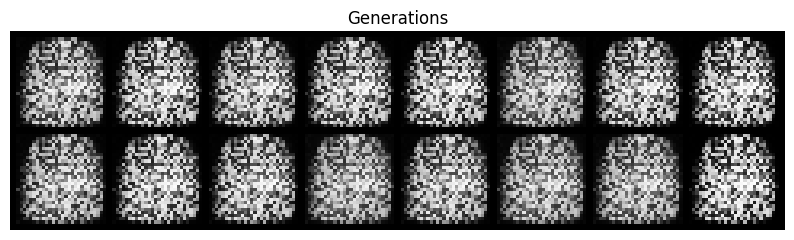

Epoch: 1, discrimiantor fake error: 0.0355, discriminator real acc: 0.941
Epoch: 2, discrimiantor fake error: 0.0223, discriminator real acc: 0.957
Epoch: 3, discrimiantor fake error: 0.00635, discriminator real acc: 0.979
Epoch: 4, discrimiantor fake error: 0.00116, discriminator real acc: 0.992
Epoch: 5, discrimiantor fake error: 0.00179, discriminator real acc: 0.995
Epoch: 6, discrimiantor fake error: 0.00146, discriminator real acc: 0.997
Epoch: 7, discrimiantor fake error: 0.00258, discriminator real acc: 0.997
Epoch: 8, discrimiantor fake error: 0.00787, discriminator real acc: 0.993
Epoch: 9, discrimiantor fake error: 0.0207, discriminator real acc: 0.983
Epoch: 10, discrimiantor fake error: 0.0186, discriminator real acc: 0.979


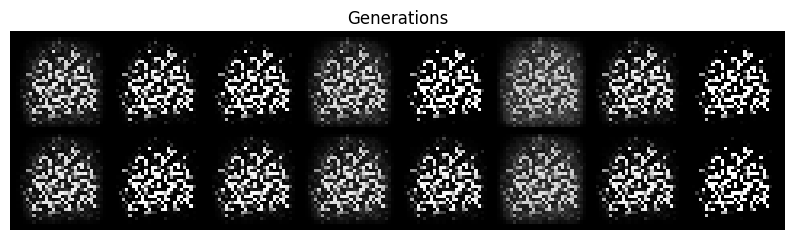

Epoch: 11, discrimiantor fake error: 0.0107, discriminator real acc: 0.986
Epoch: 12, discrimiantor fake error: 0.00673, discriminator real acc: 0.992
Epoch: 13, discrimiantor fake error: 0.0217, discriminator real acc: 0.985
Epoch: 14, discrimiantor fake error: 0.051, discriminator real acc: 0.957
Epoch: 15, discrimiantor fake error: 0.0226, discriminator real acc: 0.971
Epoch: 16, discrimiantor fake error: 0.0151, discriminator real acc: 0.984
Epoch: 17, discrimiantor fake error: 0.0213, discriminator real acc: 0.981
Epoch: 18, discrimiantor fake error: 0.0287, discriminator real acc: 0.974
Epoch: 19, discrimiantor fake error: 0.0204, discriminator real acc: 0.977
Epoch: 20, discrimiantor fake error: 0.0217, discriminator real acc: 0.979


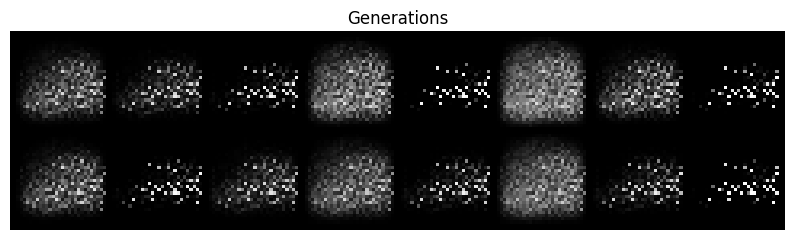

Epoch: 21, discrimiantor fake error: 0.033, discriminator real acc: 0.972
Epoch: 22, discrimiantor fake error: 0.0316, discriminator real acc: 0.966
Epoch: 23, discrimiantor fake error: 0.0228, discriminator real acc: 0.974
Epoch: 24, discrimiantor fake error: 0.0198, discriminator real acc: 0.977
Epoch: 25, discrimiantor fake error: 0.0227, discriminator real acc: 0.978
Epoch: 26, discrimiantor fake error: 0.0313, discriminator real acc: 0.968
Epoch: 27, discrimiantor fake error: 0.027, discriminator real acc: 0.971
Epoch: 28, discrimiantor fake error: 0.0196, discriminator real acc: 0.98
Epoch: 29, discrimiantor fake error: 0.0221, discriminator real acc: 0.978
Epoch: 30, discrimiantor fake error: 0.0257, discriminator real acc: 0.974


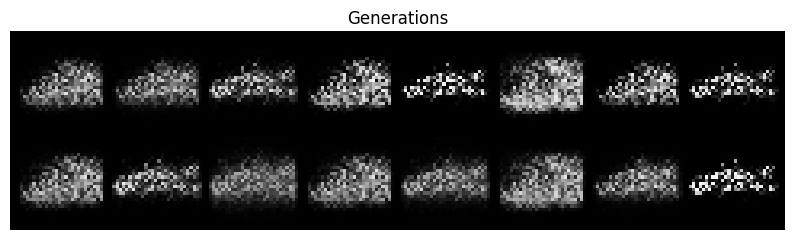

Epoch: 31, discrimiantor fake error: 0.0294, discriminator real acc: 0.971
Epoch: 32, discrimiantor fake error: 0.0258, discriminator real acc: 0.975
Epoch: 33, discrimiantor fake error: 0.0289, discriminator real acc: 0.972
Epoch: 34, discrimiantor fake error: 0.0338, discriminator real acc: 0.967
Epoch: 35, discrimiantor fake error: 0.0366, discriminator real acc: 0.964
Epoch: 36, discrimiantor fake error: 0.0381, discriminator real acc: 0.965
Epoch: 37, discrimiantor fake error: 0.0369, discriminator real acc: 0.961
Epoch: 38, discrimiantor fake error: 0.0407, discriminator real acc: 0.959
Epoch: 39, discrimiantor fake error: 0.0436, discriminator real acc: 0.957
Epoch: 40, discrimiantor fake error: 0.0379, discriminator real acc: 0.962


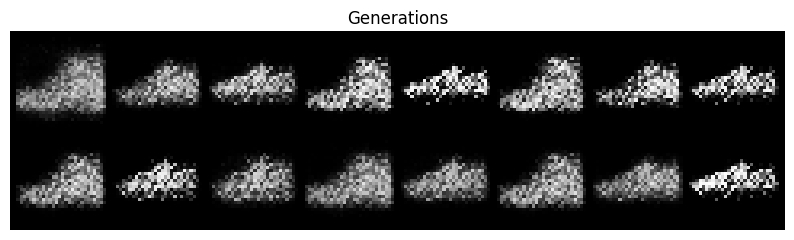

Epoch: 41, discrimiantor fake error: 0.0354, discriminator real acc: 0.966
Epoch: 42, discrimiantor fake error: 0.0385, discriminator real acc: 0.961
Epoch: 43, discrimiantor fake error: 0.0419, discriminator real acc: 0.962
Epoch: 44, discrimiantor fake error: 0.039, discriminator real acc: 0.959
Epoch: 45, discrimiantor fake error: 0.0444, discriminator real acc: 0.956
Epoch: 46, discrimiantor fake error: 0.0428, discriminator real acc: 0.959
Epoch: 47, discrimiantor fake error: 0.0417, discriminator real acc: 0.957
Epoch: 48, discrimiantor fake error: 0.0491, discriminator real acc: 0.952
Epoch: 49, discrimiantor fake error: 0.0526, discriminator real acc: 0.951
Epoch: 50, discrimiantor fake error: 0.0527, discriminator real acc: 0.95


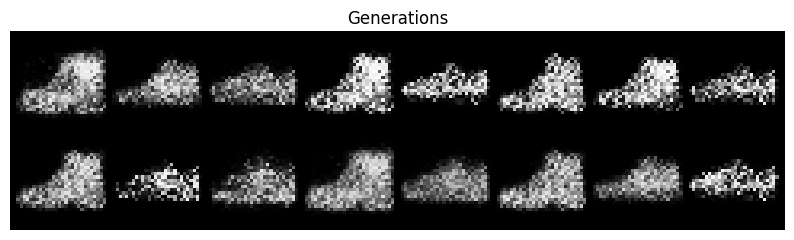

Epoch: 51, discrimiantor fake error: 0.0501, discriminator real acc: 0.948
Epoch: 52, discrimiantor fake error: 0.0541, discriminator real acc: 0.949
Epoch: 53, discrimiantor fake error: 0.057, discriminator real acc: 0.945
Epoch: 54, discrimiantor fake error: 0.0608, discriminator real acc: 0.941
Epoch: 55, discrimiantor fake error: 0.0661, discriminator real acc: 0.935
Epoch: 56, discrimiantor fake error: 0.0673, discriminator real acc: 0.936
Epoch: 57, discrimiantor fake error: 0.0705, discriminator real acc: 0.929
Epoch: 58, discrimiantor fake error: 0.0625, discriminator real acc: 0.939
Epoch: 59, discrimiantor fake error: 0.0636, discriminator real acc: 0.937
Epoch: 60, discrimiantor fake error: 0.0609, discriminator real acc: 0.938


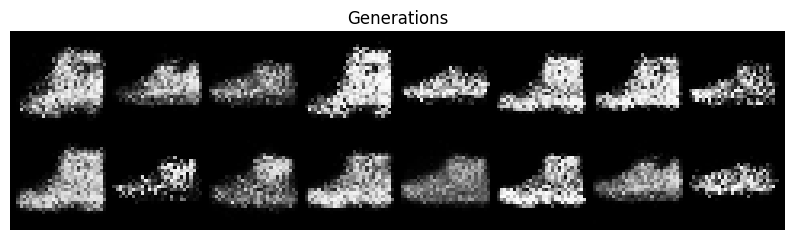

Epoch: 61, discrimiantor fake error: 0.0645, discriminator real acc: 0.937
Epoch: 62, discrimiantor fake error: 0.0671, discriminator real acc: 0.933
Epoch: 63, discrimiantor fake error: 0.0763, discriminator real acc: 0.927
Epoch: 64, discrimiantor fake error: 0.0751, discriminator real acc: 0.925
Epoch: 65, discrimiantor fake error: 0.0787, discriminator real acc: 0.922
Epoch: 66, discrimiantor fake error: 0.0684, discriminator real acc: 0.935
Epoch: 67, discrimiantor fake error: 0.0724, discriminator real acc: 0.929
Epoch: 68, discrimiantor fake error: 0.0694, discriminator real acc: 0.934
Epoch: 69, discrimiantor fake error: 0.0642, discriminator real acc: 0.933
Epoch: 70, discrimiantor fake error: 0.0675, discriminator real acc: 0.933


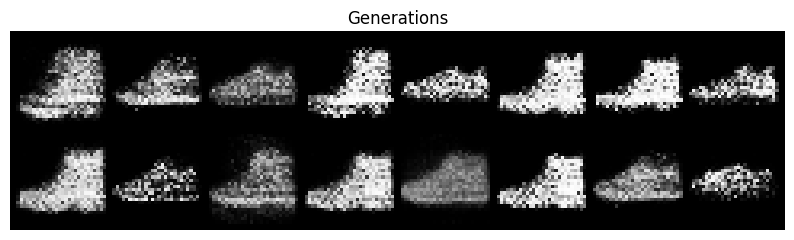

Epoch: 71, discrimiantor fake error: 0.0761, discriminator real acc: 0.924
Epoch: 72, discrimiantor fake error: 0.0717, discriminator real acc: 0.926
Epoch: 73, discrimiantor fake error: 0.0694, discriminator real acc: 0.932
Epoch: 74, discrimiantor fake error: 0.0734, discriminator real acc: 0.929
Epoch: 75, discrimiantor fake error: 0.0742, discriminator real acc: 0.926
Epoch: 76, discrimiantor fake error: 0.0736, discriminator real acc: 0.924
Epoch: 77, discrimiantor fake error: 0.0713, discriminator real acc: 0.934
Epoch: 78, discrimiantor fake error: 0.0748, discriminator real acc: 0.929
Epoch: 79, discrimiantor fake error: 0.073, discriminator real acc: 0.929
Epoch: 80, discrimiantor fake error: 0.0709, discriminator real acc: 0.931


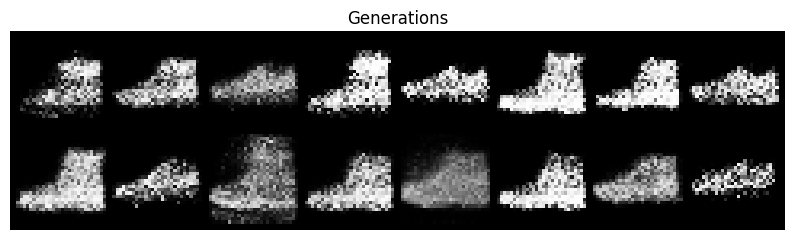

Epoch: 81, discrimiantor fake error: 0.0707, discriminator real acc: 0.929
Epoch: 82, discrimiantor fake error: 0.0739, discriminator real acc: 0.927
Epoch: 83, discrimiantor fake error: 0.0749, discriminator real acc: 0.925
Epoch: 84, discrimiantor fake error: 0.078, discriminator real acc: 0.923
Epoch: 85, discrimiantor fake error: 0.0863, discriminator real acc: 0.914
Epoch: 86, discrimiantor fake error: 0.0844, discriminator real acc: 0.918
Epoch: 87, discrimiantor fake error: 0.084, discriminator real acc: 0.916
Epoch: 88, discrimiantor fake error: 0.0837, discriminator real acc: 0.916
Epoch: 89, discrimiantor fake error: 0.091, discriminator real acc: 0.91
Epoch: 90, discrimiantor fake error: 0.094, discriminator real acc: 0.905


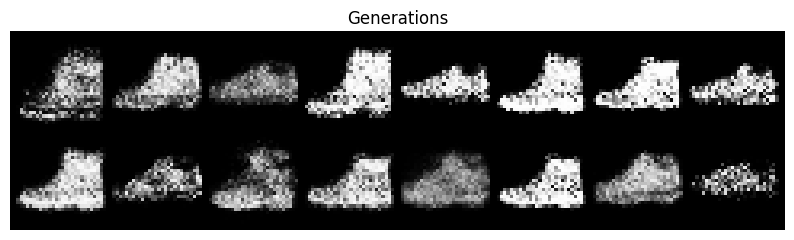

Epoch: 91, discrimiantor fake error: 0.0945, discriminator real acc: 0.903
Epoch: 92, discrimiantor fake error: 0.0955, discriminator real acc: 0.904
Epoch: 93, discrimiantor fake error: 0.0881, discriminator real acc: 0.913
Epoch: 94, discrimiantor fake error: 0.0955, discriminator real acc: 0.907
Epoch: 95, discrimiantor fake error: 0.089, discriminator real acc: 0.909
Epoch: 96, discrimiantor fake error: 0.0972, discriminator real acc: 0.905
Epoch: 97, discrimiantor fake error: 0.0918, discriminator real acc: 0.91
Epoch: 98, discrimiantor fake error: 0.0924, discriminator real acc: 0.906
Epoch: 99, discrimiantor fake error: 0.0857, discriminator real acc: 0.913


In [8]:
G_losses = []
D_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    # For each batch in the dataloader
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(train_loader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        discriminator_optimizer.zero_grad()
        # Format batch
        real_images = data[0].to(device)
        b_size = real_images.size(0)
        label = torch.ones((b_size,), dtype=torch.float, device=device) # Setting labels for real images
        # Forward pass real batch through D
        output = discriminator(real_images).view(-1)
        # Calculate loss on all-real batch
        error_discriminator_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        discriminator_real_acc.append(output.mean().item())

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(b_size, latent_dim,device=device)
        # Generate fake image batch with Generator
        fake_images = generator(noise)
        label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
        # Classify all fake batch with Discriminator
        output = discriminator(fake_images.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        error_discriminator_fake = criterion(output, label_fake)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        discriminator_fake_acc.append(output.mean().item())
        # Compute error of D as sum over the fake and the real batches
        error_discriminator = error_discriminator_real + error_discriminator_fake
        error_discriminator.backward()
        # Update D
        discriminator_optimizer.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        label = torch.ones((b_size,), dtype=torch.float, device=device)  # fake labels are real for generator cost
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = discriminator(fake_images).view(-1)
        # Calculate G's loss based on this output
        error_generator = criterion(output, label)
        # Calculate gradients for G
        error_generator.backward()
        D_G_z2 = output.mean().item()
        # Update G
        generator_optimizer.step()

        # Output training stats
        # Save Losses for plotting later
        G_losses.append(error_generator.item())
        D_losses.append(error_discriminator.item())

    print(f"Epoch: {epoch}, discrimiantor fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = generator(fixed_noise).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()

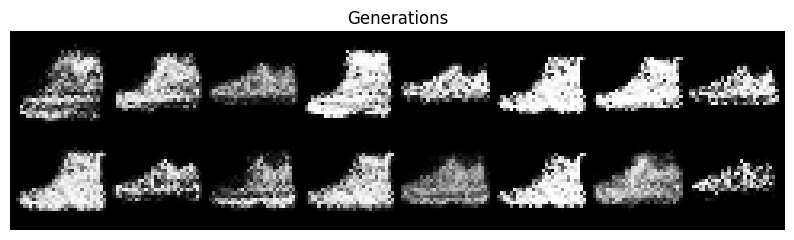

In [9]:
with torch.no_grad():
    fake = generator(fixed_noise).detach().cpu()
grid = torchvision.utils.make_grid(fake)
grid = grid.permute(1, 2, 0)
plt.figure(figsize=(10,10))
plt.title(f"Generations")
plt.imshow(grid)
plt.axis('off')
plt.show()

## Mini Zadanie: stwórzmy model warunkowany klasą
Może się przydać F.one_hot

In [10]:
from torch.nn.functional import one_hot

In [11]:
one_hot(torch.tensor([4,3,4]),10)

tensor([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

Epoch: 0, discrimiantor fake error: 0.0617, discriminator real acc: 0.84


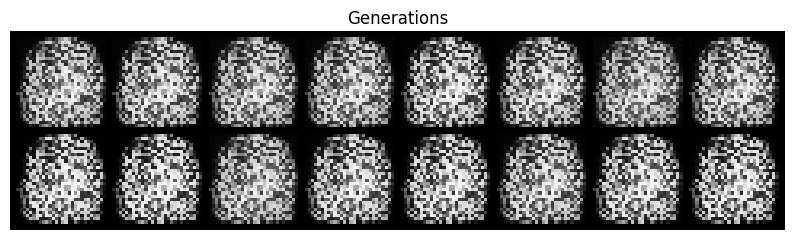

Epoch: 1, discrimiantor fake error: 0.0302, discriminator real acc: 0.949
Epoch: 2, discrimiantor fake error: 0.0261, discriminator real acc: 0.964
Epoch: 3, discrimiantor fake error: 0.00756, discriminator real acc: 0.981
Epoch: 4, discrimiantor fake error: 0.00164, discriminator real acc: 0.993
Epoch: 5, discrimiantor fake error: 0.00137, discriminator real acc: 0.996
Epoch: 6, discrimiantor fake error: 0.00183, discriminator real acc: 0.997
Epoch: 7, discrimiantor fake error: 0.00255, discriminator real acc: 0.997
Epoch: 8, discrimiantor fake error: 0.0131, discriminator real acc: 0.99
Epoch: 9, discrimiantor fake error: 0.0293, discriminator real acc: 0.977
Epoch: 10, discrimiantor fake error: 0.0238, discriminator real acc: 0.974


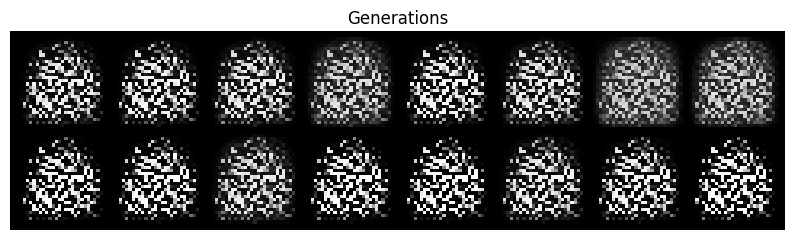

Epoch: 11, discrimiantor fake error: 0.0103, discriminator real acc: 0.985
Epoch: 12, discrimiantor fake error: 0.00565, discriminator real acc: 0.993
Epoch: 13, discrimiantor fake error: 0.0101, discriminator real acc: 0.991
Epoch: 14, discrimiantor fake error: 0.0412, discriminator real acc: 0.969
Epoch: 15, discrimiantor fake error: 0.0344, discriminator real acc: 0.964
Epoch: 16, discrimiantor fake error: 0.0191, discriminator real acc: 0.979
Epoch: 17, discrimiantor fake error: 0.0153, discriminator real acc: 0.984
Epoch: 18, discrimiantor fake error: 0.0312, discriminator real acc: 0.975
Epoch: 19, discrimiantor fake error: 0.0347, discriminator real acc: 0.965
Epoch: 20, discrimiantor fake error: 0.0179, discriminator real acc: 0.977


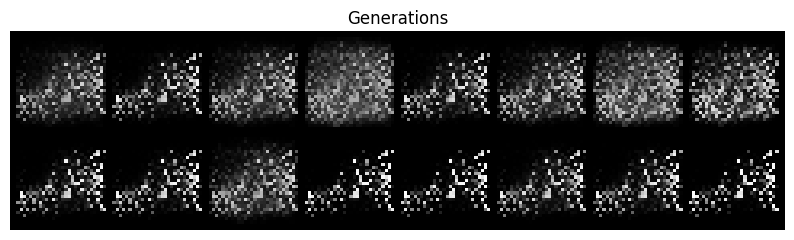

Epoch: 21, discrimiantor fake error: 0.0116, discriminator real acc: 0.986
Epoch: 22, discrimiantor fake error: 0.0162, discriminator real acc: 0.985
Epoch: 23, discrimiantor fake error: 0.0291, discriminator real acc: 0.972
Epoch: 24, discrimiantor fake error: 0.0265, discriminator real acc: 0.974
Epoch: 25, discrimiantor fake error: 0.0211, discriminator real acc: 0.978
Epoch: 26, discrimiantor fake error: 0.0192, discriminator real acc: 0.981
Epoch: 27, discrimiantor fake error: 0.0246, discriminator real acc: 0.975
Epoch: 28, discrimiantor fake error: 0.0239, discriminator real acc: 0.976
Epoch: 29, discrimiantor fake error: 0.0188, discriminator real acc: 0.981
Epoch: 30, discrimiantor fake error: 0.019, discriminator real acc: 0.979


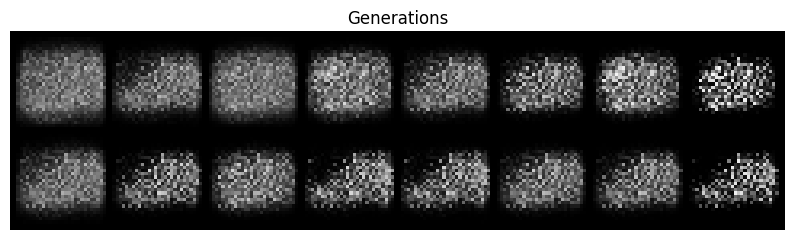

Epoch: 31, discrimiantor fake error: 0.023, discriminator real acc: 0.977
Epoch: 32, discrimiantor fake error: 0.0281, discriminator real acc: 0.973
Epoch: 33, discrimiantor fake error: 0.0313, discriminator real acc: 0.97
Epoch: 34, discrimiantor fake error: 0.0341, discriminator real acc: 0.967
Epoch: 35, discrimiantor fake error: 0.0371, discriminator real acc: 0.965
Epoch: 36, discrimiantor fake error: 0.0328, discriminator real acc: 0.969
Epoch: 37, discrimiantor fake error: 0.0367, discriminator real acc: 0.964
Epoch: 38, discrimiantor fake error: 0.0387, discriminator real acc: 0.963
Epoch: 39, discrimiantor fake error: 0.04, discriminator real acc: 0.961
Epoch: 40, discrimiantor fake error: 0.0409, discriminator real acc: 0.96


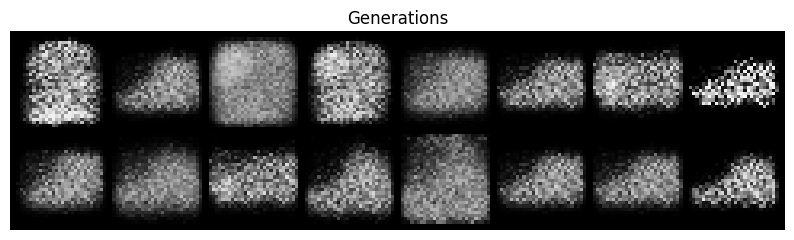

Epoch: 41, discrimiantor fake error: 0.0408, discriminator real acc: 0.96
Epoch: 42, discrimiantor fake error: 0.0412, discriminator real acc: 0.963
Epoch: 43, discrimiantor fake error: 0.0505, discriminator real acc: 0.953
Epoch: 44, discrimiantor fake error: 0.0499, discriminator real acc: 0.95
Epoch: 45, discrimiantor fake error: 0.0492, discriminator real acc: 0.956
Epoch: 46, discrimiantor fake error: 0.0505, discriminator real acc: 0.952
Epoch: 47, discrimiantor fake error: 0.056, discriminator real acc: 0.946
Epoch: 48, discrimiantor fake error: 0.0491, discriminator real acc: 0.952
Epoch: 49, discrimiantor fake error: 0.0532, discriminator real acc: 0.95
Epoch: 50, discrimiantor fake error: 0.0571, discriminator real acc: 0.945


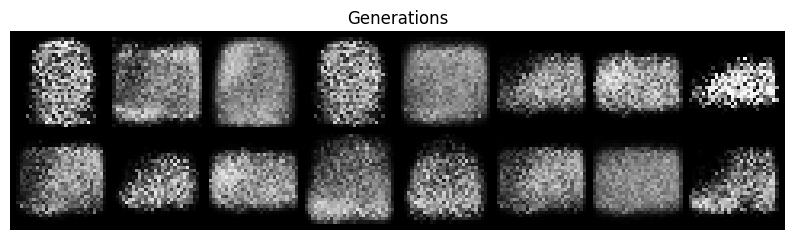

Epoch: 51, discrimiantor fake error: 0.0565, discriminator real acc: 0.944
Epoch: 52, discrimiantor fake error: 0.0621, discriminator real acc: 0.943
Epoch: 53, discrimiantor fake error: 0.0619, discriminator real acc: 0.938
Epoch: 54, discrimiantor fake error: 0.0695, discriminator real acc: 0.934
Epoch: 55, discrimiantor fake error: 0.0671, discriminator real acc: 0.933
Epoch: 56, discrimiantor fake error: 0.0616, discriminator real acc: 0.94
Epoch: 57, discrimiantor fake error: 0.0618, discriminator real acc: 0.942
Epoch: 58, discrimiantor fake error: 0.0734, discriminator real acc: 0.928
Epoch: 59, discrimiantor fake error: 0.066, discriminator real acc: 0.936
Epoch: 60, discrimiantor fake error: 0.0671, discriminator real acc: 0.934


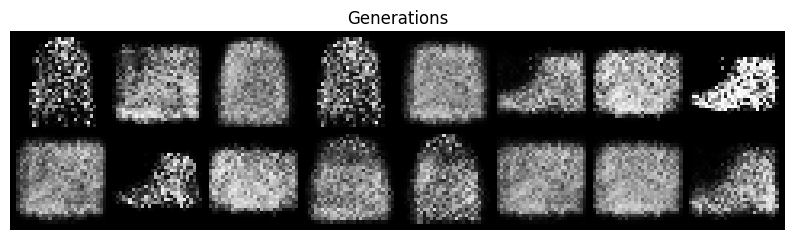

Epoch: 61, discrimiantor fake error: 0.074, discriminator real acc: 0.93
Epoch: 62, discrimiantor fake error: 0.0708, discriminator real acc: 0.932
Epoch: 63, discrimiantor fake error: 0.0652, discriminator real acc: 0.933
Epoch: 64, discrimiantor fake error: 0.0658, discriminator real acc: 0.933
Epoch: 65, discrimiantor fake error: 0.0649, discriminator real acc: 0.936
Epoch: 66, discrimiantor fake error: 0.0627, discriminator real acc: 0.937
Epoch: 67, discrimiantor fake error: 0.073, discriminator real acc: 0.928
Epoch: 68, discrimiantor fake error: 0.0717, discriminator real acc: 0.927
Epoch: 69, discrimiantor fake error: 0.084, discriminator real acc: 0.915
Epoch: 70, discrimiantor fake error: 0.09, discriminator real acc: 0.91


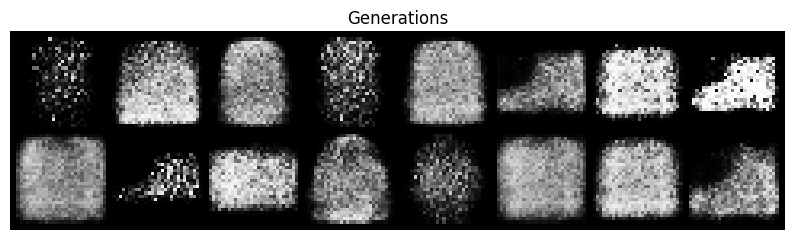

Epoch: 71, discrimiantor fake error: 0.0892, discriminator real acc: 0.908
Epoch: 72, discrimiantor fake error: 0.0883, discriminator real acc: 0.909
Epoch: 73, discrimiantor fake error: 0.0928, discriminator real acc: 0.908
Epoch: 74, discrimiantor fake error: 0.0921, discriminator real acc: 0.905
Epoch: 75, discrimiantor fake error: 0.089, discriminator real acc: 0.911
Epoch: 76, discrimiantor fake error: 0.104, discriminator real acc: 0.896
Epoch: 77, discrimiantor fake error: 0.0936, discriminator real acc: 0.906
Epoch: 78, discrimiantor fake error: 0.0922, discriminator real acc: 0.902
Epoch: 79, discrimiantor fake error: 0.103, discriminator real acc: 0.899
Epoch: 80, discrimiantor fake error: 0.0978, discriminator real acc: 0.902


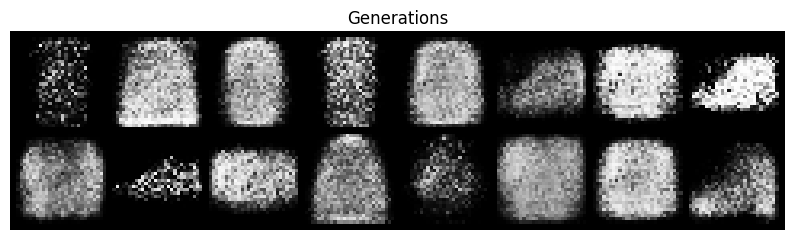

Epoch: 81, discrimiantor fake error: 0.0977, discriminator real acc: 0.901
Epoch: 82, discrimiantor fake error: 0.0997, discriminator real acc: 0.899
Epoch: 83, discrimiantor fake error: 0.103, discriminator real acc: 0.894
Epoch: 84, discrimiantor fake error: 0.109, discriminator real acc: 0.893
Epoch: 85, discrimiantor fake error: 0.103, discriminator real acc: 0.896
Epoch: 86, discrimiantor fake error: 0.106, discriminator real acc: 0.892
Epoch: 87, discrimiantor fake error: 0.104, discriminator real acc: 0.897
Epoch: 88, discrimiantor fake error: 0.105, discriminator real acc: 0.893
Epoch: 89, discrimiantor fake error: 0.115, discriminator real acc: 0.885
Epoch: 90, discrimiantor fake error: 0.112, discriminator real acc: 0.889


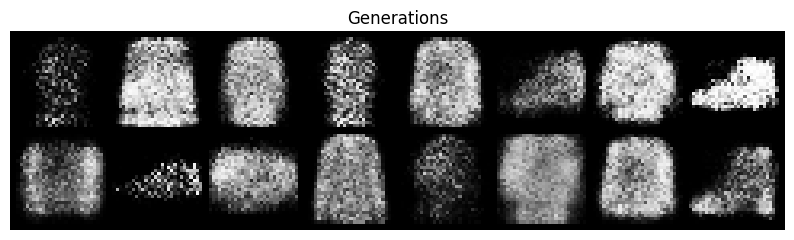

Epoch: 91, discrimiantor fake error: 0.121, discriminator real acc: 0.878
Epoch: 92, discrimiantor fake error: 0.124, discriminator real acc: 0.877
Epoch: 93, discrimiantor fake error: 0.122, discriminator real acc: 0.88
Epoch: 94, discrimiantor fake error: 0.112, discriminator real acc: 0.885
Epoch: 95, discrimiantor fake error: 0.119, discriminator real acc: 0.88
Epoch: 96, discrimiantor fake error: 0.12, discriminator real acc: 0.879
Epoch: 97, discrimiantor fake error: 0.125, discriminator real acc: 0.877
Epoch: 98, discrimiantor fake error: 0.119, discriminator real acc: 0.877
Epoch: 99, discrimiantor fake error: 0.128, discriminator real acc: 0.875


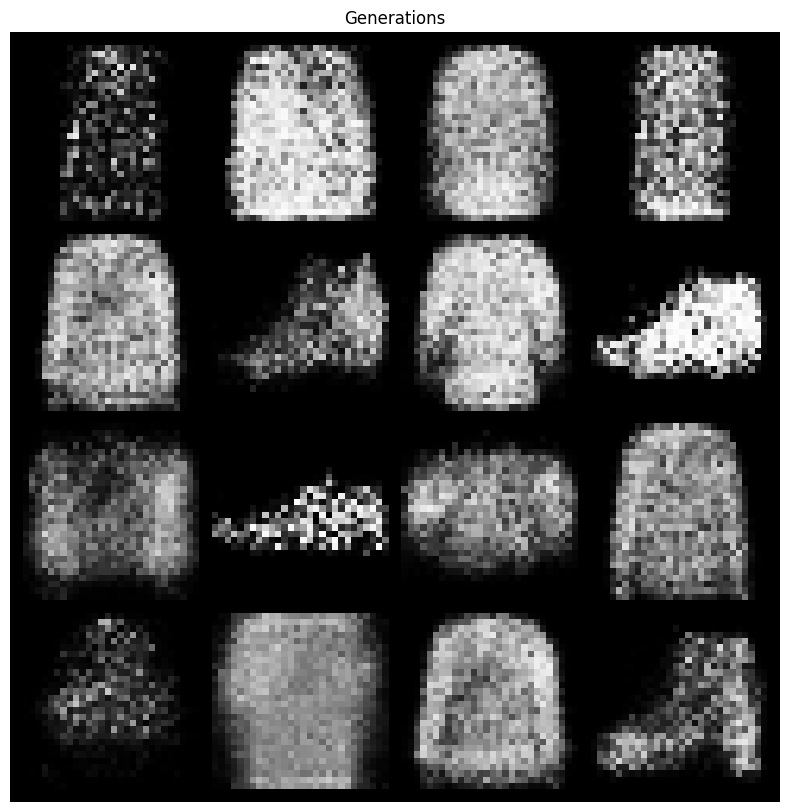

In [ ]:
class ConditionalDiscriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super(ConditionalDiscriminator, self).__init__()
 
        self.fc_1 = nn.Linear(input_dim + num_classes, hidden_dim) # Take into account the labels
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_out  = nn.Linear(hidden_dim, 1)
 
        self.LeakyReLU = nn.LeakyReLU(0.2)
 
    def forward(self, x, labels):
        x = torch.flatten(x, 1)
        x = torch.cat([x, labels], dim=1)  # Concatenate labels
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        x = self.fc_out(x)
        return x
 
class ConditionalGenerator(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim, num_classes):
        super(ConditionalGenerator, self).__init__()
        self.fc_1 = nn.Linear(latent_dim + num_classes, hidden_dim) # Take into account the labels
        self.fc_2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc_3 = nn.Linear(hidden_dim, output_dim)
 
        self.LeakyReLU = nn.LeakyReLU(0.2)
 
    def forward(self, x, labels):
        x = torch.cat([x, labels], dim=1) # Concatenate labels
        h     = self.LeakyReLU(self.fc_1(x))
        h     = self.LeakyReLU(self.fc_2(h))
 
        x_hat = torch.sigmoid(self.fc_3(h))
        x_hat = x_hat.view([-1, 1, 28, 28])
        return x_hat
 
# Models
latent_dim = 32
num_classes = 10
conditional_generator = ConditionalGenerator(latent_dim=latent_dim, hidden_dim=256, output_dim=784, num_classes=num_classes).to(device)
conditional_discriminator = ConditionalDiscriminator( hidden_dim=256, input_dim=784, num_classes=num_classes).to(device)
 
# Optimizers
generator_optimizer = torch.optim.Adam(conditional_generator.parameters(), lr=0.0001)
generator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=generator_optimizer, gamma=0.99)
discriminator_optimizer = torch.optim.Adam(conditional_discriminator.parameters(), lr=0.0001)
discriminator_scheduler = optim.lr_scheduler.ExponentialLR(optimizer=discriminator_optimizer, gamma=0.99)
 
# loss
criterion = nn.MSELoss()
 
fixed_noise = torch.randn(16, latent_dim,device=device)
fixed_labels_one_hot = F.one_hot(torch.arange(16, device=device) % 10, num_classes=10).float()
 
G_losses = []
D_losses = []
num_epochs = 100
for epoch in range(num_epochs):
    discriminator_fake_acc = []
    discriminator_real_acc = []
    for i, data in enumerate(train_loader, 0):
 
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        discriminator_optimizer.zero_grad()
        real_images, real_labels = data[0].to(device), data[1].to(device) # get also the labels
        real_labels_one_hot = F.one_hot(real_labels, num_classes=10).float() # convert to one-hot encoding
        b_size = real_images.size(0)
        label = torch.ones((b_size,), dtype=torch.float, device=device)
        output = conditional_discriminator(real_images, real_labels_one_hot).view(-1) # use conditional discriminator
        error_discriminator_real = criterion(output, label)
        discriminator_real_acc.append(output.mean().item())
 
        noise = torch.randn(b_size, latent_dim,device=device)
        random_labels = torch.randint(0, num_classes, (b_size,), device=device)  # Generqate random labels
        random_labels_one_hot = F.one_hot(random_labels, num_classes=num_classes).float()  # One-hot encode the labels
        fake_images = conditional_generator(noise, random_labels_one_hot) # use conditional generator
        label_fake = torch.zeros((b_size,), dtype=torch.float, device=device)
        output = conditional_discriminator(fake_images.detach(), random_labels_one_hot).view(-1) # use conditional discriminator
        error_discriminator_fake = criterion(output, label_fake)
        discriminator_fake_acc.append(output.mean().item())
        error_discriminator = error_discriminator_real + error_discriminator_fake
        error_discriminator.backward()
        discriminator_optimizer.step()
 
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        label = torch.ones((b_size,), dtype=torch.float, device=device)
        output = conditional_discriminator(fake_images, random_labels_one_hot).view(-1)
        error_generator = criterion(output, label)
        error_generator.backward()
        D_G_z2 = output.mean().item()
        generator_optimizer.step()
 
        G_losses.append(error_generator.item())
        D_losses.append(error_discriminator.item())
 
    print(f"Epoch: {epoch}, discrimiantor fake error: {np.mean(discriminator_fake_acc):.3}, discriminator real acc: {np.mean(discriminator_real_acc):.3}")
    generator_scheduler.step()
    discriminator_scheduler.step()
    if epoch % 10 == 0:
        with torch.no_grad():
            fake = conditional_generator(fixed_noise, fixed_labels_one_hot).detach().cpu()
        grid = torchvision.utils.make_grid(fake)
        grid = grid.permute(1, 2, 0)
        plt.figure(figsize=(10,10))
        plt.title(f"Generations")
        plt.imshow(grid)
        plt.axis('off')
        plt.show()
 
with torch.no_grad():
    fake = conditional_generator(fixed_noise, fixed_labels_one_hot).detach().cpu()
grid = torchvision.utils.make_grid(fake, nrow=4, normalize=True)
grid = grid.permute(1, 2, 0)
plt.figure(figsize=(10, 10))
plt.title(f"Generations")
plt.imshow(grid)
plt.axis('off')
plt.show()

# Modele dyfuzyjne

#### Zaszumianie danych

In [13]:
def corrupt(x, amount):
    """Corrupt the input `x` by mixing it with noise according to `amount`"""
    noise = torch.rand_like(x)
    amount = amount.view(-1, 1, 1, 1) # Sort shape so broadcasting works
    return x*(1-amount) + noise*amount

Input shape: torch.Size([8, 1, 28, 28])


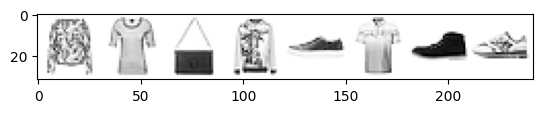

In [14]:
x, y = next(iter(train_loader))
x = x[:8]
print('Input shape:', x.shape)
plt.imshow(torchvision.utils.make_grid(x)[0], cmap='Greys');

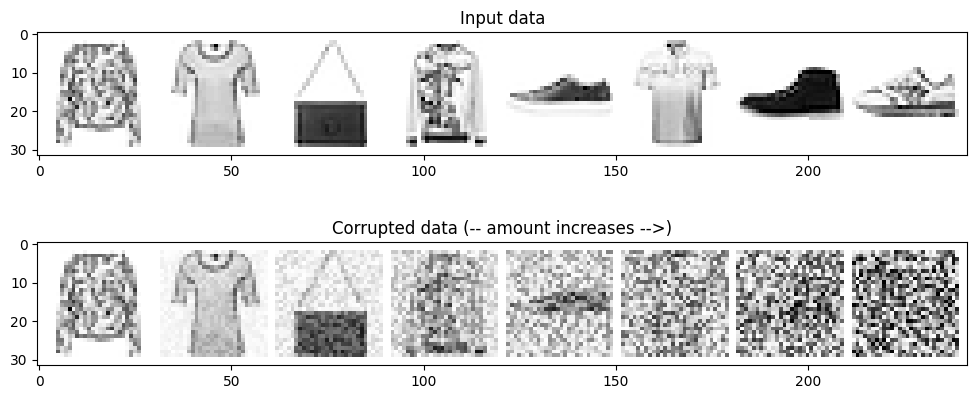

In [15]:
# Plotting the input data
fig, axs = plt.subplots(2, 1, figsize=(12, 5))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0], cmap='Greys')

# Adding noise
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Plotting the noised version
axs[1].set_title('Corrupted data (-- amount increases -->)')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0], cmap='Greys');

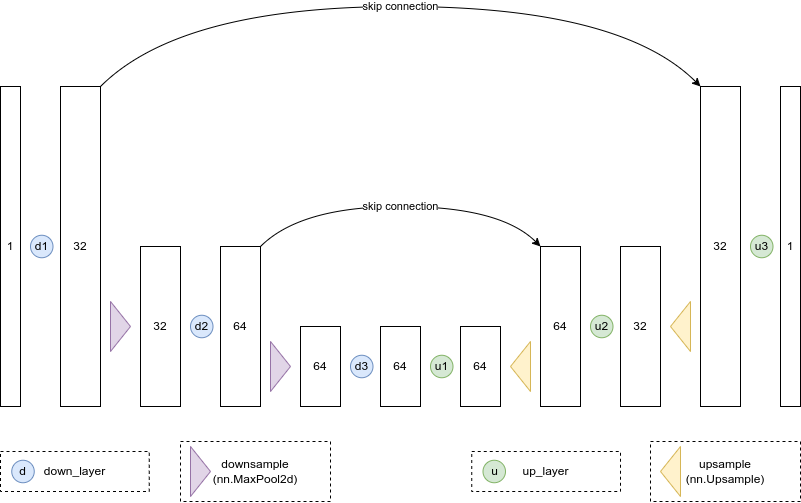

In [16]:
class BasicUNet(nn.Module):
    """A minimal UNet implementation."""
    def __init__(self, in_channels=1, out_channels=1):
        super().__init__()
        self.down_layers = torch.nn.ModuleList([
            nn.Conv2d(in_channels, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.Conv2d(64, 64, kernel_size=5, padding=2),
        ])
        self.up_layers = torch.nn.ModuleList([
            nn.Conv2d(64 + 1, 64, kernel_size=5, padding=2), #Dodajmy warunkowanie "krokiem odszumiania"
            nn.Conv2d(64, 32, kernel_size=5, padding=2),
            nn.Conv2d(32, out_channels, kernel_size=5, padding=2),
        ])
        self.act = nn.SiLU() # The activation function
        self.downscale = nn.MaxPool2d(2)
        self.upscale = nn.Upsample(scale_factor=2)

    def forward(self, x, t):
        h = []
        for i, l in enumerate(self.down_layers):
            x = self.act(l(x))
            if i < 2: # Dla wszystki warstw "down" poza ostatnim
              h.append(x) # Zapisujemy "skip-connetions"
              x = self.downscale(x) # Zmniejszamy wymiarowość, i propagujemy do kolejnej warstwy
        t = t.repeat(1,x.size(2),x.size(3),1).permute(3,0,1,2)
        x = torch.cat([x,t],dim=1)
        for i, l in enumerate(self.up_layers):
            if i > 0: # Dla wszystkich warstw up poza pierwszą
              x = self.upscale(x) # Upscale
              x += h.pop() # Dodajemy zapisane skip-connection
            x = self.act(l(x))

        return x

In [17]:
net = BasicUNet().to(device)
net

BasicUNet(
  (down_layers): ModuleList(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  )
  (up_layers): ModuleList(
    (0): Conv2d(65, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (2): Conv2d(32, 1, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  )
  (act): SiLU()
  (downscale): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (upscale): Upsample(scale_factor=2.0, mode='nearest')
)

In [18]:
sum([p.numel() for p in net.parameters()]) #Malutki model, najnowsze modele mają po kilka bilionów parametrów

310657

Finished epoch 0. Average loss for this epoch: 0.035901
Finished epoch 1. Average loss for this epoch: 0.026438
Finished epoch 2. Average loss for this epoch: 0.023857
Finished epoch 3. Average loss for this epoch: 0.021859
Finished epoch 4. Average loss for this epoch: 0.020791
Finished epoch 5. Average loss for this epoch: 0.020054
Finished epoch 6. Average loss for this epoch: 0.019573
Finished epoch 7. Average loss for this epoch: 0.019044
Finished epoch 8. Average loss for this epoch: 0.019107
Finished epoch 9. Average loss for this epoch: 0.018714
Finished epoch 10. Average loss for this epoch: 0.018503
Finished epoch 11. Average loss for this epoch: 0.018510
Finished epoch 12. Average loss for this epoch: 0.018054
Finished epoch 13. Average loss for this epoch: 0.018150
Finished epoch 14. Average loss for this epoch: 0.017743
Finished epoch 15. Average loss for this epoch: 0.017549
Finished epoch 16. Average loss for this epoch: 0.017558
Finished epoch 17. Average loss for this 

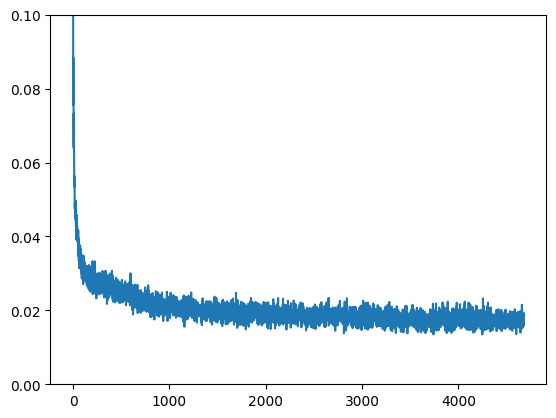

In [19]:
n_epochs = 20

# Create the network
net = BasicUNet()
net.to(device)

# Funkcja straty - zwykłe MSE
loss_fn = nn.MSELoss()

# Optymalizator
opt = torch.optim.Adam(net.parameters(), lr=1e-3)

# Wartości funkcji straty
losses = []

# The training loop
for epoch in range(n_epochs):

    for x, y in train_loader:

        # Przygotowanie danych
        x = x.to(device)
        # Losowanie ilości dodanego szumu - może być krok, albo jak w tym przypadku ciągła wartość w %
        noise_amount = torch.rand(x.shape[0]).to(device)
        noisy_x = corrupt(x, noise_amount) # Zaszumiony przykład

        # Predykcja oryginalnego - czystego obrazka
        pred = net(noisy_x, noise_amount)

        # Porównanie z oryginalnym obrazkiem
        loss = loss_fn(pred, x) #

        opt.zero_grad()
        loss.backward()
        opt.step()

        losses.append(loss.item())

    # Średni loss per epoka:
    avg_loss = sum(losses[-len(train_loader):])/len(train_loader)
    print(f'Finished epoch {epoch}. Average loss for this epoch: {avg_loss:05f}')

# View the loss curve
plt.plot(losses)
plt.ylim(0, 0.1);

## Jak dobrze model potrafi odszumiać dane?

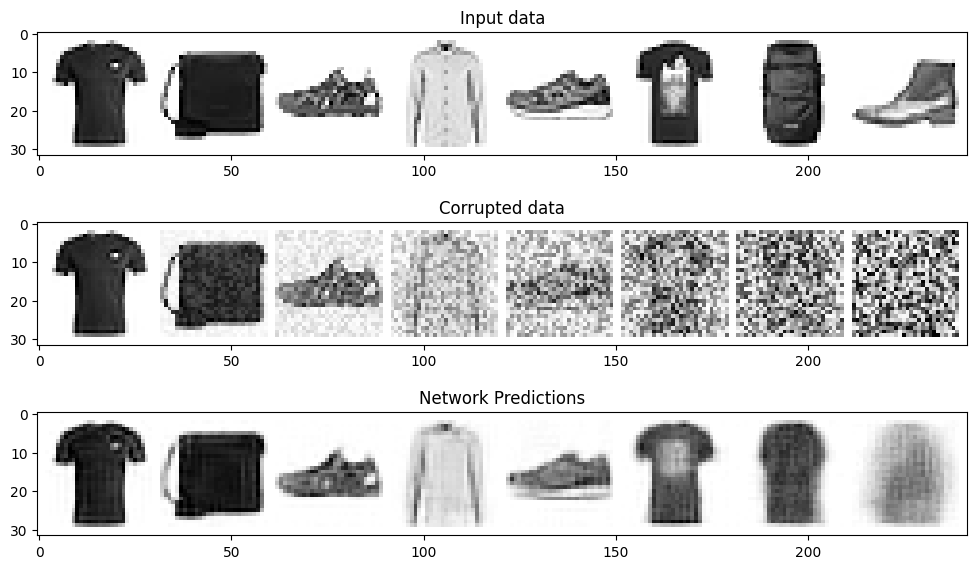

In [20]:
# Fetch some data
x, y = next(iter(train_loader))
x = x[:8] # Only using the first 8 for easy plotting

# Corrupt with a range of amounts
amount = torch.linspace(0, 1, x.shape[0]) # Left to right -> more corruption
noised_x = corrupt(x, amount)

# Get the model predictions
with torch.no_grad():
  preds = net(noised_x.to(device), amount.to(device)).detach().cpu()

# Plot
fig, axs = plt.subplots(3, 1, figsize=(12, 7))
axs[0].set_title('Input data')
axs[0].imshow(torchvision.utils.make_grid(x)[0].clip(0, 1), cmap='Greys')
axs[1].set_title('Corrupted data')
axs[1].imshow(torchvision.utils.make_grid(noised_x)[0].clip(0, 1), cmap='Greys')
axs[2].set_title('Network Predictions')
axs[2].imshow(torchvision.utils.make_grid(preds)[0].clip(0, 1), cmap='Greys');

#### Dokończ metodę samplowania
W każdym kroku t , przewidujemy oryginalny obrazek x, który chcemy zaszumić z powrotem do kroku t-1

Timestep: 1.0
Timestep: 0.8
Timestep: 0.6
Timestep: 0.4
Timestep: 0.2


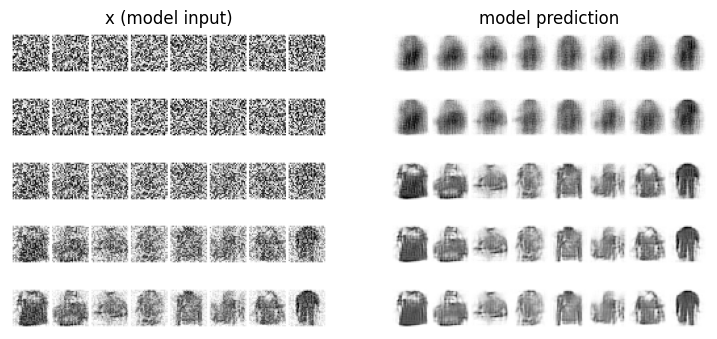

In [21]:
#@markdown Sampling strategy: Break the process into 5 steps and move 1/5'th of the way there each time:
n_steps = 5
x = torch.rand(8, 1, 28, 28).to(device) # Start from random
step_history = [x.detach().cpu()]
pred_output_history = []

for i in range(n_steps):
    t = (torch.zeros(x.size(0)) + (n_steps - i)/n_steps).to(device)
    print(f"Timestep: {t[0].item():.2}")
    with torch.no_grad():
        pred = net(x, t) # Predict the denoised x0
    pred_output_history.append(pred.detach().cpu()) # Store model output for plotting
    #---------- Uzupełnij proces generowania\
    mix_factor = i/n_steps
    x = pred * mix_factor + x * (1 - mix_factor)
    #---------------------------------------
    step_history.append(x.detach().cpu()) # Store step for plotting

fig, axs = plt.subplots(n_steps, 2, figsize=(9, 4), sharex=True)
axs[0,0].set_title('x (model input)')
axs[0,1].set_title('model prediction')
for i in range(n_steps):
    axs[i, 0].imshow(torchvision.utils.make_grid(step_history[i])[0].clip(0, 1), cmap='Greys')
    axs[i, 1].imshow(torchvision.utils.make_grid(pred_output_history[i])[0].clip(0, 1), cmap='Greys')
    axs[i, 0].axis('off')
    axs[i, 1].axis('off')

### Generacje przy 40 krokach odszumiania

(np.float64(-0.5), np.float64(241.5), np.float64(241.5), np.float64(-0.5))

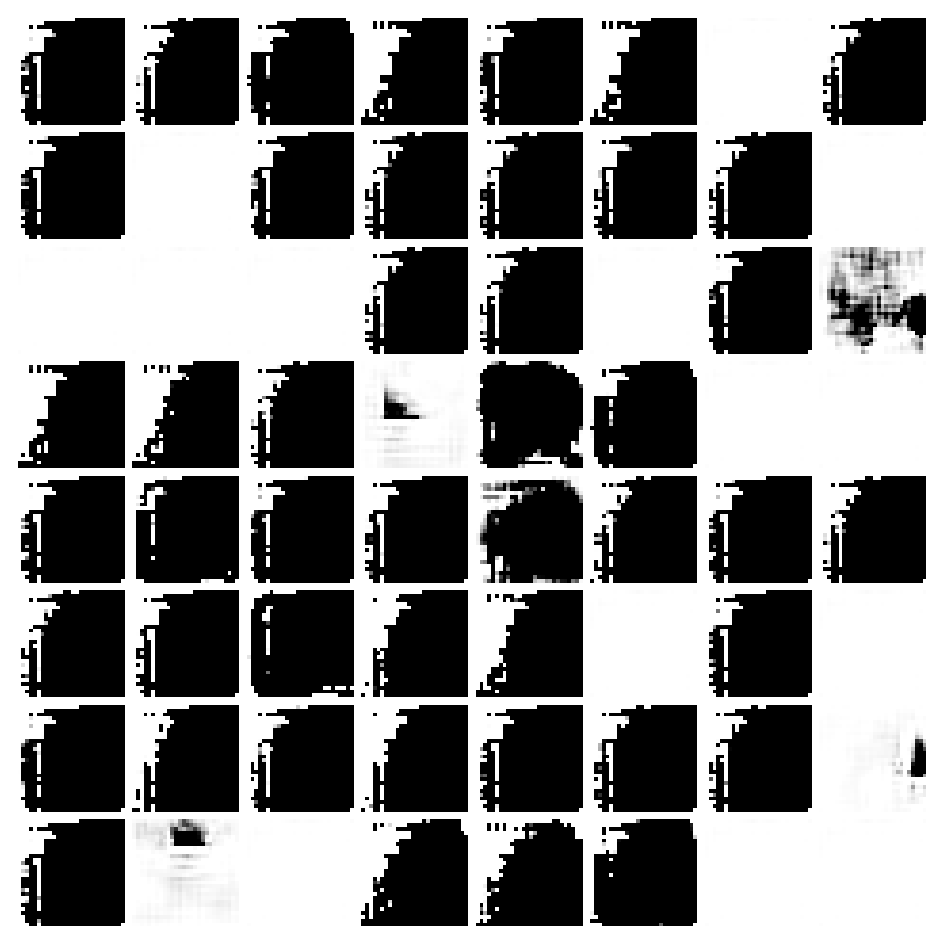

In [22]:
#@markdown Showing more results, using 40 sampling steps
n_steps = 40 # Dla 15 działa
x = torch.rand(64, 1, 28, 28).to(device)
for i in range(n_steps):
  t = (torch.zeros(x.size(0)) + (n_steps - i)/n_steps).to(device)
  noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
  with torch.no_grad():
    pred = net(x, t)
#-----------Samplowanie
    mix_factor = i/n_steps
    x = pred * mix_factor + x * (1 - mix_factor)
#----------------------
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(torchvision.utils.make_grid(x.detach().cpu(), nrow=8)[0].clip(0, 1), cmap='Greys')
ax.axis('off')

# Ewaluacja modeli generatywnych

### Stwórzmy prosty klasyfikator

In [ ]:
class Evaluator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Evaluator, self).__init__()

        self.fc_1 = nn.Linear(input_dim, hidden_dim)
        self.fc_2 = nn.Linear(hidden_dim, 50)
        self.fc_out  = nn.Linear(50, 10)

        self.LeakyReLU = nn.LeakyReLU(0.2)

    def get_features(self, x):
        x = torch.flatten(x, 1)
        x = self.LeakyReLU(self.fc_1(x))
        x = self.LeakyReLU(self.fc_2(x))
        return x


    def forward(self, x):
        x = self.get_features(x)
        x = self.fc_out(x)
        return x

evaluator = Evaluator(28*28, 256).to(device)

In [24]:
# Optimizers
optimizer = torch.optim.Adam(evaluator.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=0.97)

# loss
criterion = nn.CrossEntropyLoss()

In [25]:
num_epochs = 7
for epoch in range(num_epochs):
    for data, targets in iter(train_loader):
        data = data.to(device)
        targets = targets.to(device)

        results = evaluator(data)
        loss = criterion(results, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [26]:
num_correct = 0
total_guesses = 0

evaluator.eval()
with torch.no_grad():
    for data, targets in iter(test_loader):
        # Sends data and targets to device
        data = data.to(device)
        targets = targets.to(device)

        # Acquires the network's best guesses at each class
        results = evaluator(data)
        best_guesses = torch.argmax(results, 1)

        # Updates number of correct and total guesses
        num_correct += torch.eq(targets, best_guesses).sum().item()
        total_guesses += len(targets)

print("Correctly guessed ", num_correct/total_guesses*100, "% of the dataset")

Correctly guessed  86.64 % of the dataset


In [27]:
with torch.no_grad():
    fixed_noise = torch.randn(1000, latent_dim,device=device)
    generations_gan = generator(fixed_noise)
    # generations_vae = vae.decoder(fixed_noise)

In [28]:
n_steps = 40
x = torch.rand(1000, 1, 28, 28).to(device)
with torch.no_grad():
    for i in range(n_steps):
      t = (torch.zeros(x.size(0)) + (n_steps - i)/n_steps).to(device)
      noise_amount = torch.ones((x.shape[0], )).to(device) * (1-(i/n_steps)) # Starting high going low
      with torch.no_grad():
        pred = net(x, t)
    #-----------Samplowanie
        # x = pred
        mix_factor = 1/(n_steps - i)
        x = x*(1-mix_factor) + pred*mix_factor
generations_diffusion = x

In [29]:
orig_data = [x[0] for x in list(test_set)[:1000]]
orig_data = torch.cat(orig_data)

In [30]:
with torch.no_grad():
    dist_orig_data = evaluator.get_features(orig_data.to(device)).cpu()
    dist_gan = evaluator.get_features(generations_gan.to(device)).cpu()
    dist_diff = evaluator.get_features(generations_diffusion.to(device)).cpu()
    # dist_vae = evaluator.get_features(generations_vae.to(device)).cpu()

### Możemy ręcznie przeglądać poszczególne wymiary i oglądać nieścisłości względem rzeczywistych danych

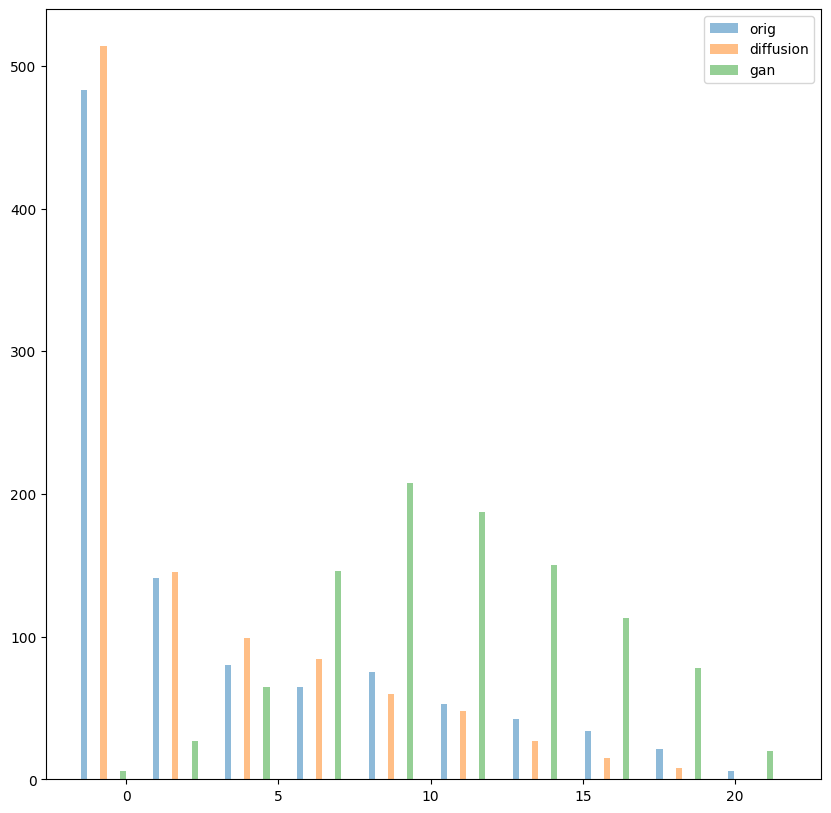

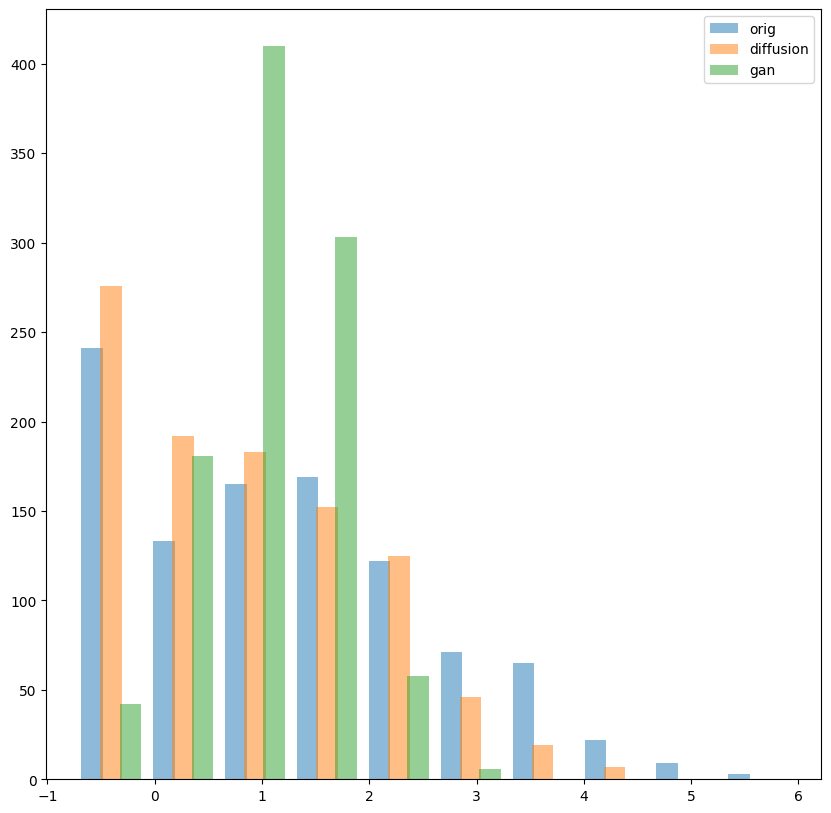

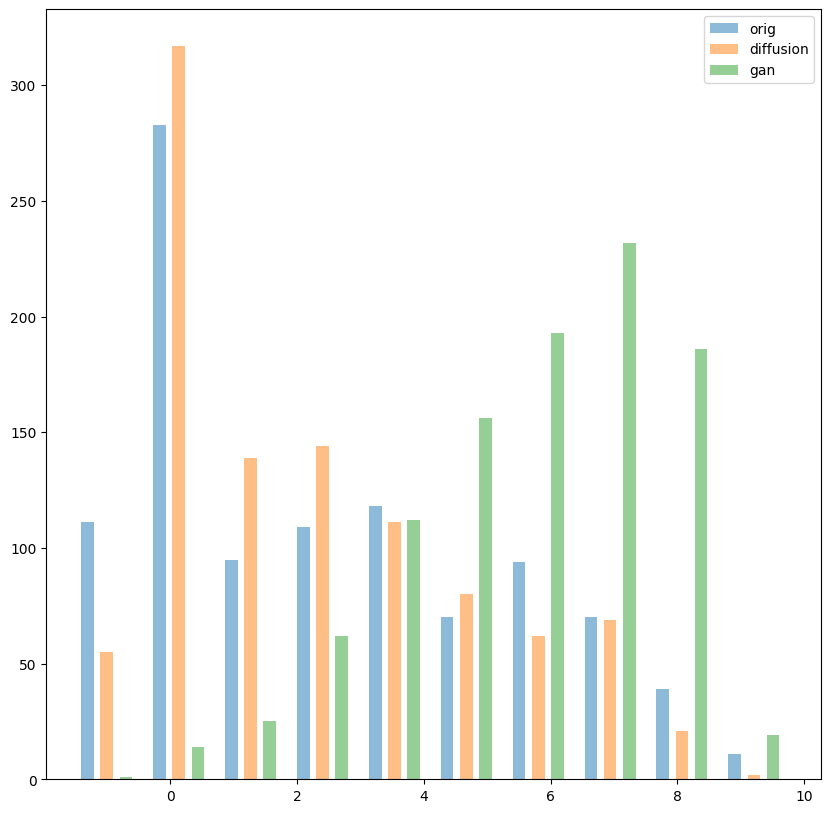

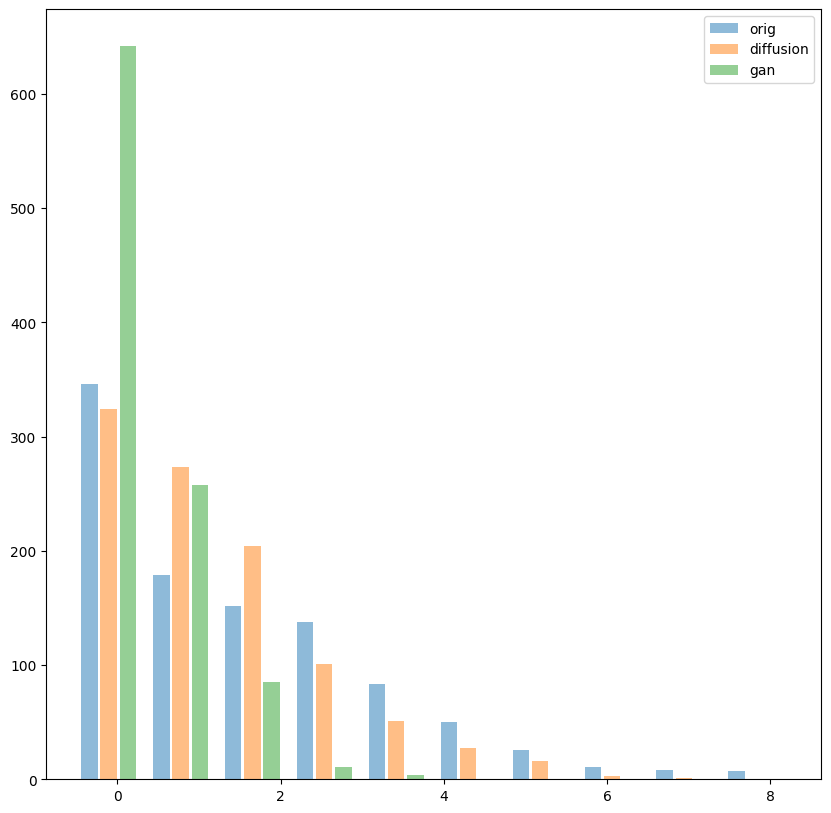

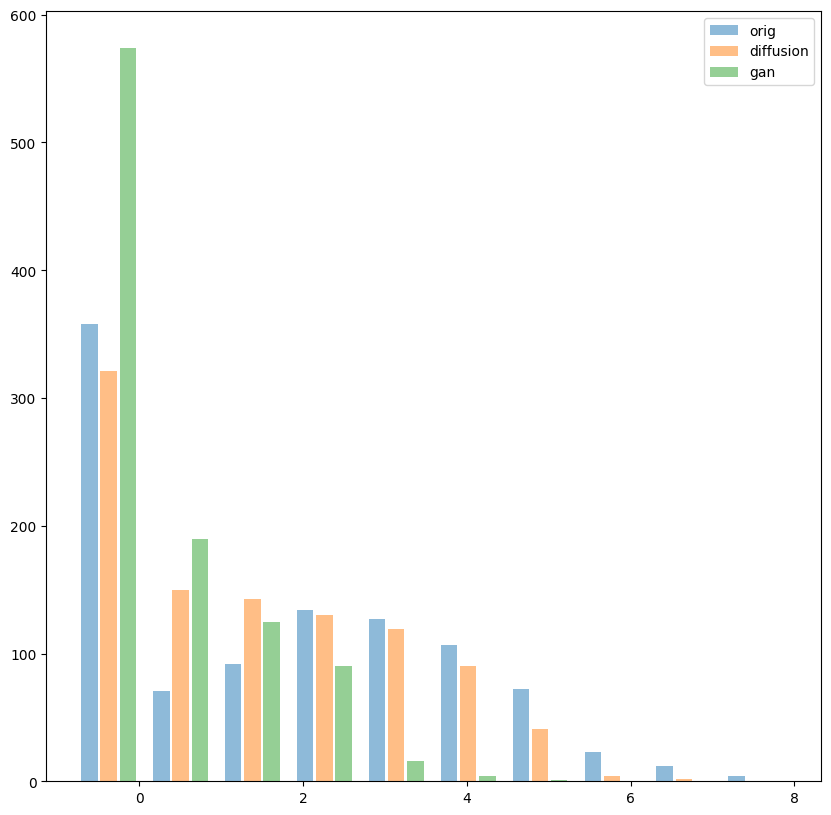

In [31]:
for idx in range(5):
    bins = 10
    w = 0.2
    plt.figure(figsize=(10,10))
    plt.hist([dist_orig_data[:,idx].numpy(),dist_diff[:,idx].numpy(),dist_gan[:,idx]], bins, alpha=0.5, label=['orig','diffusion','gan'],width=w)
    plt.legend(loc='upper right')
    plt.show();
    plt.close()

## Albo wykorzystać gotową metrykę (FID):

In [32]:
######### Frechet Inception distance based on implementation from https://github.com/mseitzer/pytorch-fid

import numpy as np
from scipy import linalg


def calculate_frechet_distance(distribution_1, distribution_2, eps=1e-6):
    mu1 = np.mean(distribution_1, axis=0)
    sigma1 = np.cov(distribution_1, rowvar=False)

    mu2 = np.mean(distribution_2, axis=0)
    sigma2 = np.cov(distribution_2, rowvar=False)

    """Numpy implementation of the Frechet Distance.
    The Frechet distance between two multivariate Gaussians X_1 ~ N(mu_1, C_1)
    and X_2 ~ N(mu_2, C_2) is
            d^2 = ||mu_1 - mu_2||^2 + Tr(C_1 + C_2 - 2*sqrt(C_1*C_2)).
    Stable version by Dougal J. Sutherland.
    Params:
    -- mu1   : Numpy array containing the activations of a layer of the
               inception net (like returned by the function 'get_predictions')
               for generated samples.
    -- mu2   : The sample mean over activations, precalculated on an
               representative data set.
    -- sigma1: The covariance matrix over activations for generated samples.
    -- sigma2: The covariance matrix over activations, precalculated on an
               representative data set.
    Returns:
    --   : The Frechet Distance.
    """

    mu1 = np.atleast_1d(mu1)
    mu2 = np.atleast_1d(mu2)

    sigma1 = np.atleast_2d(sigma1)
    sigma2 = np.atleast_2d(sigma2)

    assert mu1.shape == mu2.shape, \
        'Training and test mean vectors have different lengths'
    assert sigma1.shape == sigma2.shape, \
        'Training and test covariances have different dimensions'

    diff = mu1 - mu2

    # Product might be almost singular
    covmean, _ = linalg.sqrtm(sigma1.dot(sigma2), disp=False)
    if not np.isfinite(covmean).all():
        msg = ('fid calculation produces singular product; '
               'adding %s to diagonal of cov estimates') % eps
        print(msg)
        offset = np.eye(sigma1.shape[0]) * eps
        covmean = linalg.sqrtm((sigma1 + offset).dot(sigma2 + offset))

    # Numerical error might give slight imaginary component
    if np.iscomplexobj(covmean):
        if not np.allclose(np.diagonal(covmean).imag, 0, atol=1e-3):
            m = np.max(np.abs(covmean.imag))
            raise ValueError('Imaginary component {}'.format(m))
        covmean = covmean.real

    tr_covmean = np.trace(covmean)

    return (diff.dot(diff) + np.trace(sigma1) +
            np.trace(sigma2) - 2 * tr_covmean)

In [33]:
orig_data_2 = [x[0] for x in list(test_set)[-1000:]]
orig_data_2 = torch.cat(orig_data_2)
with torch.no_grad():
    dist_orig_data_2 = evaluator.get_features(orig_data_2.to(device)).cpu()

In [34]:
for name, obj in zip(['orig','diff','gan','cond_gan'],[dist_orig_data_2.numpy(),dist_diff.numpy(),dist_gan.numpy()]):
    print(f"FD {name}: {calculate_frechet_distance(dist_orig_data.numpy(),obj)}")

FD orig: 1.8162722706241539
FD diff: 20.247213235292406
FD gan: 443.6270675838319


### Im mniej tym lepiej, z zastrzeżeniem że nawet 2 części oryginalnego datasetu będą się trochę między sobą różniły (nigdy FID nie będzie równe 0)